# PyMuPDF: Inserting an Annotation on a PDF Page

This notebook creates a new, empty PDF and a new page in ISO A4 format.
We define a "Circle" annotation and display the result.
> **_Note:_** Apart from importing PyMuPDF itself (fitz), we need some technical preparations which will allow us to display graphical content inline with this document.

In [1]:
# uncomment the following line(s) to ensure that all packages are available:
# !python -m pip install matplotlib
# !python -m pip install -U pymupdf

%matplotlib inline
import fitz  # import PyMuPDF

def show_image(pix):
    """Display a pixmap using matplotlib and numpy."""
    import matplotlib.pyplot as plt  # needed for displaying intermediate images
    import numpy as np  # needed for displaying intermediate images
    img = np.ndarray((pix.h, pix.w, 3), dtype=np.uint8, buffer=pix.samples_mv)  # raw image to numpy array
    image = plt.imshow(img)  # let matplotlib show the image

Create a new PDF with a new page:

In [2]:
doc = fitz.open()
page = doc.new_page()

Define some rectangle within which we want to show the annotation: size: 200 x 100, top-left: (100, 100), bottom-right (300, 200).

In [3]:
rect = fitz.Rect(100, 100, 300, 200)

We now make a 'Circle' (ellipse) annotation.

In [4]:
annot = page.add_circle_annot(rect)

The result is an **_actual circle only_** if `rect.width == rect.height`, otherwise an ellipse. In our case, the result will be an **_ellipse_**.

Here are some basic annotation information.

In [5]:
print(annot)
for k, v in annot.info.items():
    print(f"{k} = '{v}'")

'Circle' annotation on page 0 of <new PDF, doc# 1>
content = ''
name = ''
title = ''
creationDate = ''
modDate = ''
subject = ''
id = 'fitz-A0'


The standard colors for **'Circle'** annotations are **black** for the border ('stroke') and *None* (empty) for the interior ('fill'), see here:

In [6]:
print(annot.colors)  # show the default colors

{'stroke': (1.0, 0.0, 0.0), 'fill': None}


Let's not be **that** boring and give our annotation a **red** border and a **yellow** interior:

In [7]:
annot.set_colors(stroke=fitz.pdfcolor["red"], fill=fitz.pdfcolor["yellow"])

Changes to an annotation's appearance require invoking its `update()` method to activate them.

This is needed only once - after all desired changes have been made.

In [8]:
annot.update()

Here is how the annotation looks like:

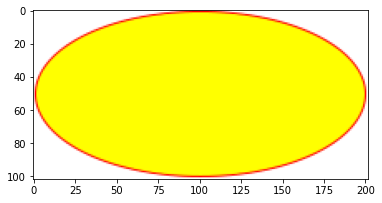

In [9]:
pix = annot.get_pixmap()  # create a raw image of our annotation
show_image(pix)  # show it here

And here is the image of the **full page**, showing the annotation's location on it:

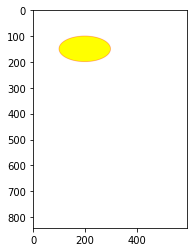

In [10]:
pix = page.get_pixmap()  # make raw image of the full page
show_image(pix)